#**Data Cleaning**

In [123]:
import pandas as pd
import numpy as np
data = pd.read_csv("deliverytime.csv")
data.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0                    75.912471        Snack      motorcycle                24  
1                    77.813237        Snack         scooter                33  
2                    77.688400       Drinks      motorcycle                26  
3                    77.026494       Buffet      motorcycle                21  
4                    80.289982        Snack         scooter                30

In [124]:
data.shape

(45593, 11)

In [125]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [126]:
data.duplicated().sum()

0

In [127]:
data.describe()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         45593.000000             45593.000000         45593.000000   
mean             29.544075                 4.632367            17.017729   
std               5.696793                 0.327708             8.185109   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.600000            12.933284   
50%              29.000000                 4.700000            18.546947   
75%              34.000000                 4.800000            22.728163   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45593.000000                45593.000000   
mean              70.231332                   17.465186   
std               22.883647                    7.335122   
min              -88.366217                    0.010000   
25%               73.170000                   12.988453   
50%               75.898497                   18.633934   
75%               78.044095                   22.785049   
max               88.433452                   31.054057   

       Delivery_location_longitude  Time_taken(min)  
count                 45593.000000     45593.000000  
mean                     70.845702        26.294607  
std                      21.118812         9.383806  
min                       0.010000        10.000000  
25%                      73.280000        19.000000  
50%                      76.002574        26.000000  
75%                      78.107044        32.000000  
max                      88.563452        54.000000

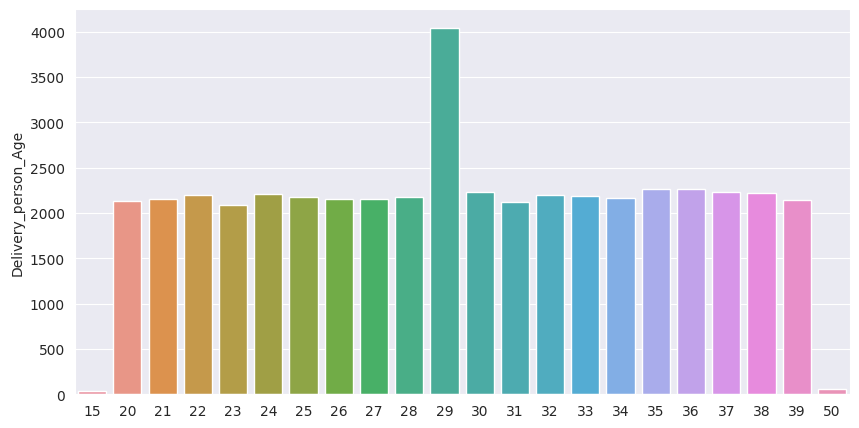

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
age_counts = data['Delivery_person_Age'].value_counts()
sorted_ages = age_counts.index.sort_values()
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.barplot(x=sorted_ages, y=age_counts[sorted_ages])
plt.show()

In [129]:
data['Type_of_vehicle'].value_counts()

motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: Type_of_vehicle, dtype: int64

In [130]:
data['Type_of_order'].value_counts()

Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: Type_of_order, dtype: int64

In [131]:
#I want to calculate the distance betwenn the resturant location to the delivry location
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)'],
      dtype='object')

In [132]:
data.loc[:,[ 'Restaurant_latitude','Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude']]

Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                22.745049             75.892471                   22.765049   
1                12.913041             77.683237                   13.043041   
2                12.914264             77.678400                   12.924264   
3                11.003669             76.976494                   11.053669   
4                12.972793             80.249982                   13.012793   
...                    ...                   ...                         ...   
45588            26.902328             75.794257                   26.912328   
45589             0.000000              0.000000                    0.070000   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude  
0                        75.912471  
1                        77.813237  
2                        77.688400  
3                        77.026494  
4                        80.289982  
...                            ...  
45588                    75.804257  
45589                     0.070000  
45590                    80.272439  
45591                    77.026241  
45592                    85.405731  

[45593 rows x 4 columns]

In [133]:
#to calculate the distance between two points
from math import cos, asin, sqrt, pi
def distance_calculator(lat1, lon1, lat2, lon2):
    r = 6371 # km
    p = pi / 180

    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 2 * r * asin(sqrt(a))

In [134]:
for i in range(len(data)):
  data.loc[i,'distance'] = distance_calculator(data.loc[i,'Restaurant_latitude'],data.loc[i,'Restaurant_longitude'],data.loc[i,'Delivery_location_latitude'],data.loc[i,'Delivery_location_longitude'])

In [135]:
data.rename(columns={'distance': 'Distance/Km'}, inplace=True)

In [136]:
new_data = data.drop(['Restaurant_latitude',	'Restaurant_longitude',	'Delivery_location_latitude',	'Delivery_location_longitude'], axis = 1)
new_data

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      4607     INDORES13DEL02                   37                      4.9   
1      B379     BANGRES18DEL02                   34                      4.5   
2      5D6D     BANGRES19DEL01                   23                      4.4   
3      7A6A    COIMBRES13DEL02                   38                      4.7   
4      70A2     CHENRES12DEL01                   32                      4.6   
...     ...                ...                  ...                      ...   
45588  7C09      JAPRES04DEL01                   30                      4.8   
45589  D641      AGRRES16DEL01                   21                      4.6   
45590  4F8D     CHENRES08DEL03                   30                      4.9   
45591  5EEE    COIMBRES11DEL01                   20                      4.7   
45592  5FB2   RANCHIRES09DEL02                   23                      4.9   

      Type_of_order Type_of_vehicle  Time_taken(min)  Distance/Km  
0            Snack      motorcycle                24     3.025149  
1            Snack         scooter                33    20.183530  
2           Drinks      motorcycle                26     1.552758  
3           Buffet      motorcycle                21     7.790401  
4            Snack         scooter                30     6.210138  
...             ...             ...              ...          ...  
45588         Meal      motorcycle                32     1.489846  
45589       Buffet      motorcycle                36    11.007735  
45590       Drinks         scooter                16     4.657195  
45591        Snack      motorcycle                26     6.232393  
45592        Snack         scooter                36    12.074396  

[45593 rows x 8 columns]

<ipython-input-137-dbe707a4b038>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



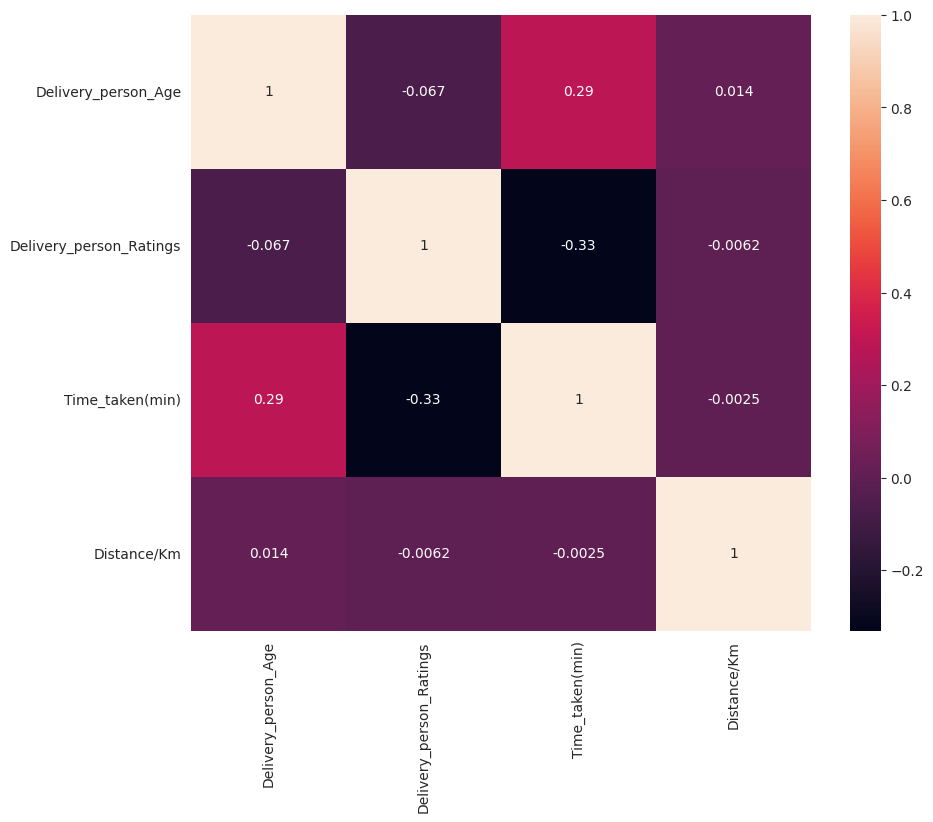

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = new_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='rocket')
plt.show()

In [138]:
fig = px.scatter(data_frame = new_data , x='Distance/Km' ,y='Time_taken(min)', size ='Time_taken(min)' ,trendline="ols",
                 title = "Relationship Between Time_taken and Type_of_vehicle")
fig.show()
#اكثر التوصيل بين 25 الى 30 دقيقه

In [139]:
import plotly.express as px
#كل نوع سياره و مدة التوصيل
fig = px.scatter(data_frame = new_data , x='Distance/Km' ,y='Time_taken(min)', size ='Time_taken(min)' , color= 'Type_of_vehicle',
                 title = "Relationship Between Time_taken and Type_of_vehicle")
fig.show()

In [140]:
#التقييم بناء على مدة توصيل كل نوع سياره
fig = px.scatter(data_frame = new_data , x='Delivery_person_Ratings' ,y='Time_taken(min)', size ='Time_taken(min)' , color= 'Type_of_vehicle',
                 title = "Relationship Between Time_taken and Type_of_vehicle")
fig.show()

In [141]:
#المدة المستغرقه للتوصيل بناءا على عمر المندوب
fig = px.scatter(data_frame = new_data , x='Delivery_person_Age' ,y='Time_taken(min)', size ='Time_taken(min)' , color= 'Delivery_person_Ratings',
                 title = "Relationship Between Time Taken and Age")
fig.show()

In [142]:
fig = px.scatter(data_frame = new_data , x='Delivery_person_Age' ,y='Time_taken(min)', size ='Time_taken(min)' , color= 'Distance/Km',trendline="ols",
                 title = "Relationship Between Time Taken and Age")
fig.show()
#young age dilvery faster

#**Models**

In [150]:
new_data

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0      4607     INDORES13DEL02                   37                      4.9   
1      B379     BANGRES18DEL02                   34                      4.5   
2      5D6D     BANGRES19DEL01                   23                      4.4   
3      7A6A    COIMBRES13DEL02                   38                      4.7   
4      70A2     CHENRES12DEL01                   32                      4.6   
...     ...                ...                  ...                      ...   
45588  7C09      JAPRES04DEL01                   30                      4.8   
45589  D641      AGRRES16DEL01                   21                      4.6   
45590  4F8D     CHENRES08DEL03                   30                      4.9   
45591  5EEE    COIMBRES11DEL01                   20                      4.7   
45592  5FB2   RANCHIRES09DEL02                   23                      4.9   

      Type_of_order Type_of_vehicle  Time_taken(min)  Distance/Km  
0            Snack      motorcycle                24     3.025149  
1            Snack         scooter                33    20.183530  
2           Drinks      motorcycle                26     1.552758  
3           Buffet      motorcycle                21     7.790401  
4            Snack         scooter                30     6.210138  
...             ...             ...              ...          ...  
45588         Meal      motorcycle                32     1.489846  
45589       Buffet      motorcycle                36    11.007735  
45590       Drinks         scooter                16     4.657195  
45591        Snack      motorcycle                26     6.232393  
45592        Snack         scooter                36    12.074396  

[45593 rows x 8 columns]

In [178]:
data_Type_of_vehicle = new_data[['Type_of_vehicle']]
data_Type_of_vehicle.reset_index()

index Type_of_vehicle
0          0     motorcycle 
1          1        scooter 
2          2     motorcycle 
3          3     motorcycle 
4          4        scooter 
...      ...             ...
45588  45588     motorcycle 
45589  45589     motorcycle 
45590  45590        scooter 
45591  45591     motorcycle 
45592  45592        scooter 

[45593 rows x 2 columns]

In [183]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_Type_of_vehicle_1hat = cat_encoder.fit_transform(data_Type_of_vehicle)
# pd.DataFrame(data_Type_of_vehicle_1hat.toarray())
data_Type_of_vehicle_1hat

<45593x4 sparse matrix of type '<class 'numpy.float64'>'
	with 45593 stored elements in Compressed Sparse Row format>

In [184]:
# the featurs that help me in predict
#age , ratings , distance

from sklearn.model_selection import train_test_split

data_predict = new_data.drop(['ID','Delivery_person_ID','Type_of_order','Type_of_vehicle','Delivery_person_Ratings'],axis = 1)

x = data_predict.drop(["Time_taken(min)"], axis=1)
y = data_predict["Time_taken(min)"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [185]:
x_train

Delivery_person_Age  Distance/Km
29044                   37     1.514805
41736                   28     4.663310
17874                   24    10.586541
42093                   34     6.058874
22952                   28    17.297866
...                    ...          ...
11284                   37    17.139220
44732                   34    13.407093
38158                   39     6.122095
860                     25     7.760938
15795                   31     9.220882

[36474 rows x 2 columns]

In [186]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

x_train = num_pipeline.fit_transform(x_train)

In [187]:
x_train

array([[ 1.30573868, -0.08894236],
       [-0.27410738, -0.08611576],
       [-0.97626118, -0.08079811],
       ...,
       [ 1.65681558, -0.08480612],
       [-0.80072273, -0.08333483],
       [ 0.25250797, -0.08202415]])

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [189]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
 #كم خطا المودل , يتاخر 5 دقايق او يتقدم 5 دقايق
predictions = model.predict(x_test)
mean = mean_absolute_error(y_test, predictions)
mean

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names



8.767380903452512

In [190]:
model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names



array([24.95918367, 24.95918367, 24.95918367, ..., 24.95918367,
       24.95918367, 24.95918367])

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state= 42 ),
    RandomForestRegressor(random_state= 42 )
]

param_grid = [
    {},
    {'max_depth': [3, 5, 7, 9]},
    {'n_estimators': [100,200,300]}
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(x_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("-"*100)

LinearRegression:
Best parameters: {}
Best score: 0.08511750295328431
----------------------------------------------------------------------------------------------------
DecisionTreeRegressor:
Best parameters: {'max_depth': 5}
Best score: 0.24771099718113393
----------------------------------------------------------------------------------------------------
RandomForestRegressor:
Best parameters: {'n_estimators': 300}
Best score: 0.032184831297118556
----------------------------------------------------------------------------------------------------


In [192]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.057254      0.421049         0.239442        0.016364   
1      10.034628      0.291472         0.478398        0.033752   
2      15.053943      0.182632         0.716242        0.044050   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}           0.031366   
1                200  {'n_estimators': 200}           0.032699   
2                300  {'n_estimators': 300}           0.033676   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.015000           0.021177           0.047479           0.037529   
1           0.015931           0.022194           0.047470           0.037938   
2           0.016529           0.023262           0.048736           0.038721   

   mean_test_score  std_test_score  rank_test_score  
0         0.030510        0.011538                3  
1         0.031247        0.011194                2  
2         0.032185        0.011345                1

#**Boosting**

In [193]:
from sklearn.ensemble import GradientBoostingRegressor
#big model and has differents models inside
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                 learning_rate=1.0, random_state=42)
gbrt.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [194]:
#sub pred from actual
gbrt.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but GradientBoostingRegressor was fitted without feature names



-0.09930869805262477

In [195]:
gbrt_best = GradientBoostingRegressor(
    max_depth=2, learning_rate=0.05, n_estimators=500,
    n_iter_no_change=10, random_state=42)
gbrt_best.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [196]:
gbrt_best.n_estimators_

153